In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/urani1/final_project_dataset.pkl
/kaggle/input/urani1/tester.py
/kaggle/input/urani1/feature_format.py
/kaggle/input/enron-email-dataset/emails.csv


# Importing the pkl file

In [9]:
import pickle
original = "/kaggle/input/urani1/final_project_dataset.pkl"
destination = "final_dataset.pkl"

content = ''
outsize = 0
with open(original, 'rb') as infile:
    content = infile.read()
with open(destination, 'wb') as output:
    for line in content.splitlines():
        outsize += len(line) + 1
        output.write(line + str.encode('\n'))

In [10]:
enron = pickle.load(open("final_dataset.pkl", "rb"))
enron.pop('TOTAL') #dictionary

{'salary': 26704229,
 'to_messages': 'NaN',
 'deferral_payments': 32083396,
 'total_payments': 309886585,
 'loan_advances': 83925000,
 'bonus': 97343619,
 'email_address': 'NaN',
 'restricted_stock_deferred': -7576788,
 'deferred_income': -27992891,
 'total_stock_value': 434509511,
 'expenses': 5235198,
 'from_poi_to_this_person': 'NaN',
 'exercised_stock_options': 311764000,
 'from_messages': 'NaN',
 'other': 42667589,
 'from_this_person_to_poi': 'NaN',
 'poi': False,
 'long_term_incentive': 48521928,
 'shared_receipt_with_poi': 'NaN',
 'restricted_stock': 130322299,
 'director_fees': 1398517}

# Defining FeatureFormat and the return list

In [11]:

def featureFormat( dictionary, features, remove_NaN=True, remove_all_zeroes=True, remove_any_zeroes=False, sort_keys = False):
    return_list = []
    if isinstance(sort_keys, str):
        import pickle
        keys = pickle.load(open(sort_keys, "rb"))
    elif sort_keys:
        keys = sorted(dictionary.keys())
    else:
        keys = dictionary.keys()

    for key in keys:
        tmp_list = []
        for feature in features:
            try:
                dictionary[key][feature]
            except KeyError:
                print ("error: key ", feature, " not present")
                return
            value = dictionary[key][feature]
            if value=="NaN" and remove_NaN:
                value = 0
            tmp_list.append( float(value) )

        # Logic for deciding whether or not to add the data point.
        append = True
        # exclude 'poi' class as criteria.
        if features[0] == 'poi':
            test_list = tmp_list[1:]
        else:
            test_list = tmp_list
        ### if all features are zero and you want to remove
        ### data points that are all zero, do that here
        if remove_all_zeroes:
            append = False
            for item in test_list:
                if item != 0 and item != "NaN":
                    append = True
                    break
        ### if any features for a given data point are zero
        ### and you want to remove data points with any zeroes,
        ### handle that here
        if remove_any_zeroes:
            if 0 in test_list or "NaN" in test_list:
                append = False
        ### Append the data point if flagged for addition.
        if append:
            return_list.append( np.array(tmp_list) )

    return np.array(return_list)

In [12]:
def targetFeatureSplit( data ):
    target = []
    features = []
    for item in data:
        target.append( item[0] )
        features.append( item[1:] )

    return target, features

# Checking the relationship between different features by scatterplot

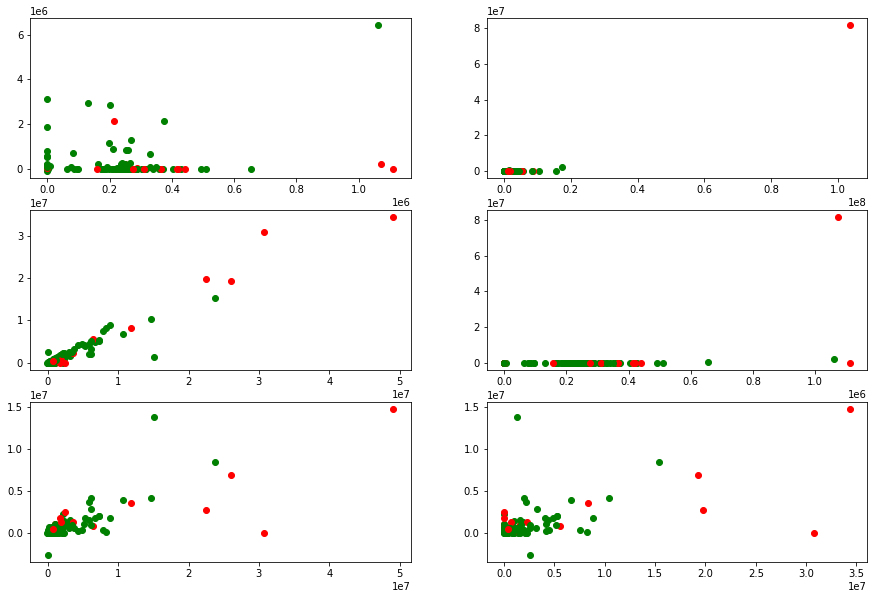

In [13]:
import os
import matplotlib.pyplot as plt
from sklearn import preprocessing
fig,a=plt.subplots(3,2,squeeze=False,figsize=(15,10))
ff1=featureFormat(enron,["poi","salary","deferral_payments"])
for y in range(len(ff1)):
    if ff1[y][0]==True:
        a[0][0].scatter(ff1[y][1],ff1[y][2],color='r')
    else:
        a[0][0].scatter(ff1[y][1],ff1[y][2],color='g')
ff2=featureFormat(enron,["poi","total_payments","loan_advances"])
for z in range(len(ff2)):
    if ff2[z][0]==True:
        a[0][1].scatter(ff2[z][1],ff2[z][2],color='r')
    else:
        a[0][1].scatter(ff2[z][1],ff2[z][2],color='g')
ff3=featureFormat(enron,["poi","total_stock_value","exercised_stock_options"])
for z in range(len(ff3)):
    if ff3[z][0]==True:
        a[1][0].scatter(ff3[z][1],ff3[z][2],color='r')
    else:
        a[1][0].scatter(ff3[z][1],ff3[z][2],color='g')
ff4=featureFormat(enron,["poi","salary","loan_advances","deferral_payments"])
for z in range(len(ff4)):
    if ff4[z][0]==True:
        a[1][1].scatter(ff4[z][1],ff4[z][2],color='r')
    else:
        a[1][1].scatter(ff4[z][1],ff4[z][2],color='g')
ff5=featureFormat(enron,["poi","total_stock_value","restricted_stock"])
for z in range(len(ff5)):
    if ff5[z][0]==True:
        a[2][0].scatter(ff5[z][1],ff5[z][2],color='r')
    else:
        a[2][0].scatter(ff5[z][1],ff5[z][2],color='g')     
        
ff6=featureFormat(enron,["poi","exercised_stock_options","restricted_stock"])
for z in range(len(ff6)):
    if ff6[z][0]==True:
        a[2][1].scatter(ff6[z][1],ff6[z][2],color='r')
    else:
        a[2][1].scatter(ff6[z][1],ff6[z][2],color='g') 

plt.show()

# Defining new feature

In [14]:
def dict_to_list(key,normalizer):
    feature_list=[]

    for i in enron:
        if enron[i][key]=="NaN" or enron[i][normalizer]=="NaN":
            feature_list.append(0.)
        elif enron[i][key]>=0:
            feature_list.append(float(enron[i][key])/float(enron[i][normalizer]))
    return feature_list

fraction_from_poi_email=dict_to_list("from_poi_to_this_person","to_messages")
fraction_to_poi_email=dict_to_list("from_this_person_to_poi","from_messages")
p = 0
for i in enron:
    enron[i]["fraction_from_poi_email"]=fraction_from_poi_email[p]
    enron[i]["fraction_to_poi_email"]=fraction_to_poi_email[p]
    p=p+1

# TRAIN/TESTing the data using diffeerent classifier

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
feature_list = ['poi','shared_receipt_with_poi','fraction_from_poi_email','fraction_to_poi_email',"deferral_payments"]
u = featureFormat(enron, feature_list)
labels, features = targetFeatureSplit(u)
X_train, X_test, Y_train, Y_test = train_test_split(features, labels,test_size=0.2,random_state=42)

# USING RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
rr=RandomForestClassifier(max_depth=10, criterion = 'entropy')
rr.fit(X_train,Y_train)
print("Accuracy using RandomForestClassifier:",accuracy_score(Y_test, rr.predict(X_test)))

#USING KNN CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
# for i in range(2,17):
#     neigh = KNeighborsClassifier(n_neighbors=i)
#     neigh.fit(X_train,Y_train)
#     print(accuracy_score(Y_test, neigh.predict(X_test)))
#best accuracy for n=6
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(X_train,Y_train)
print("Accuracy using KNN classifier: ",accuracy_score(Y_test, neigh.predict(X_test)))

#USING GAUSSIAN NAIVE BAYES CLASSIFIER
from sklearn.naive_bayes import GaussianNB
gb=GaussianNB()
gb.fit(X_train,Y_train)
print("Accuracy using GaussianNB classifier: ",accuracy_score(Y_test, gb.predict(X_test)))

Accuracy using RandomForestClassifier: 0.9047619047619048
Accuracy using KNN classifier:  0.9523809523809523
Accuracy using GaussianNB classifier:  0.8571428571428571


# KNN CLASSIFIER has the best accuracy of 95.2%

# Printing the predicted values vs the actual values for different classifiers

In [20]:
print(Y_test)
print(rr.predict(X_test))
print(neigh.predict(X_test))
print(gb.predict(X_test))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
